In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 18      # Set the general plotting font size
plt.rc("font", family="serif")
#Skaleret positive som fkt af tiden for AG og PCR

In [2]:
fit_to_latest = True

foldername = "../Data-Epidemiologiske-Rapport-16042021-10uu/"
filenameAG = "Antigentests_pr_dag.csv"
filenamePCR1 = "Municipality_cases_time_series.csv"
filenamePCR2 = "Municipality_tested_persons_time_series.csv" 

AG_test = pd.read_csv(foldername+filenameAG, sep=';', thousands='.', index_col=0)
data_posi = pd.read_csv(foldername+filenamePCR1, sep=';', thousands='.', index_col=0)
data_test = pd.read_csv(foldername+filenamePCR2, sep=';', thousands='.', index_col=0)

print(AG_test)

# Print how much data is included:
date_start = "2021-02-20"            # This is thus day 0
if fit_to_latest :
    date_end = AG_test.index[-3]   # Omitting the very latest data point (with ~0 statistics)
else :
    date_end = "2021-04-14"          # Value in latest report files
print("  Data used: ", date_start, "-", date_end)


AG_ntest = AG_test["AG_testede"]
AG_posi = AG_test["AG_pos"]
PAG_all = AG_posi.loc[date_start:date_end]
ePAG_all = np.sqrt(PAG_all)
TAG_all = AG_ntest.loc[date_start:date_end]
eTAG_all = np.sqrt(TAG_all)

P_all = data_posi.loc[date_start:date_end].sum(axis=1)
eP_all = np.sqrt(P_all)
T_all = data_test.loc[date_start:date_end].sum(axis=1)
eT_all = np.sqrt(T_all)

            AG_testede  AG_pos  AGpos_PCRkonf Andel_AGpos_PCRkonf_pct  \
Dato                                                                    
2021-02-01        4774       8              4                      50   
2021-02-02        4598       8              5                    62,5   
2021-02-03        4820       9              5        55,5555555555556   
2021-02-04        4462       4              2                      50   
2021-02-05        4325       7              5        71,4285714285714   
...                ...     ...            ...                     ...   
2021-04-08      228408     263            223        84,7908745247148   
2021-04-09      185567     205            180        87,8048780487805   
2021-04-10       90207     155            133        85,8064516129032   
2021-04-11      158139     211            191         90,521327014218   
2021-04-12      268586     302            271        89,7350993377484   

            AGpos_minusPCRkonf Andel_AGminusPCRkon

In [3]:
# Average time between generations (in days):
tG = 4.7
# Number of positive tests and uncertainty, assuming fixed number of daily tests and power law correction:
Power = -0.50
# To account for larger uncertainties in positives in data than simply the statistical:
SystError = 0.0                      # Should be included at some point
SystErrorScale = 1.0                 # 1.0 (i.e. doubling of error) works OK!

In [4]:
# These are also the days where corrections are applied:
Plot_StartDay = 0         # 1st of January 2021
Plot_EndDay   = len(PAG_all)

# Calculate the Scaled Positives (SP):
nAveDailyAGTests_all = TAG_all.mean()
print("Average number of AG tests: ", nAveDailyAGTests_all)
fPosAG_all = PAG_all / TAG_all
efPosAG_all = np.sqrt(fPosAG_all*(1.0-fPosAG_all)/TAG_all + SystError**2)
ePAG_all  = np.sqrt(TAG_all*fPosAG_all*(1-fPosAG_all)) * (1.0 + SystErrorScale)
SPAG_all  = PAG_all  * (TAG_all / nAveDailyAGTests_all)**Power
eSPAG_all = ePAG_all * (TAG_all / nAveDailyAGTests_all)**Power

# Calculate the Scaled Positives (SP):
nAveDailyTests_all = T_all.mean()
print("Average number of PCR tests: ", nAveDailyTests_all)
fPos_all = P_all / T_all
efPos_all = np.sqrt(fPos_all*(1.0-fPos_all)/T_all + SystError**2)
eP_all  = np.sqrt(T_all*fPos_all*(1-fPos_all)) * (1.0 + SystErrorScale)
SP_all  = P_all  * (T_all / nAveDailyTests_all)**Power
eSP_all = eP_all * (T_all / nAveDailyTests_all)**Power

Average number of AG tests:  84699.74
Average number of PCR tests:  150741.74


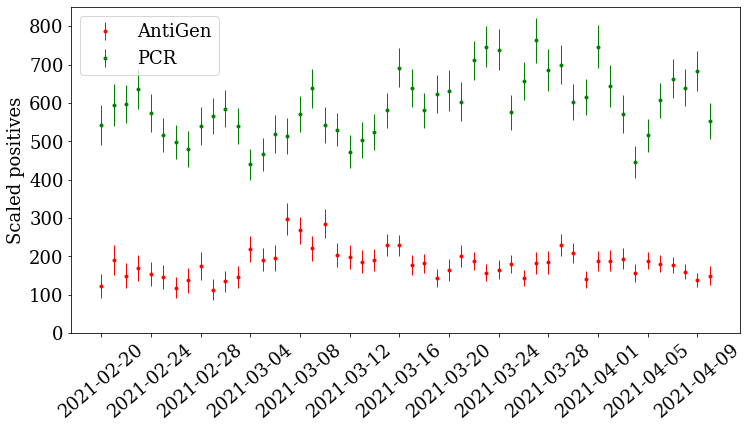

In [11]:
days = np.arange(len(PAG_all))

fig, ax=plt.subplots(figsize=(12,6))
ax.errorbar(P_all.index,SPAG_all,yerr=eSPAG_all,fmt='.', linewidth=1, label='AntiGen', color='red')
ax.errorbar(P_all.index,SP_all,yerr=eSP_all,fmt='.', linewidth=1, label='PCR', color='green')
ax.legend(loc='best')
ax.set(ylabel="Scaled positives",ylim=(0,850))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
for label in ax.get_xticklabels():
        label.set_rotation(40)
plt.show()

In [6]:
def corr(a,b):
    return np.sum((a-np.mean(a)) * (b-np.mean(b))) / ((a.size - 1) * np.std(a,ddof=1) * np.std(b,ddof=1))

print(corr(SPAG_all[:-3], SP_all[3:]))
print(corr(SPAG_all[:-2], SP_all[2:]))
print(corr(SPAG_all[:-1], SP_all[1:]))
print(corr(SPAG_all,SP_all))
print(corr(SPAG_all[1:],SP_all[:-1]))
print(corr(SPAG_all[2:],SP_all[:-2]))
print(corr(SPAG_all[3:],SP_all[:-3]))

-0.03683462668515654
-0.04466918250097885
-0.06948426127244191
-0.04180772232036224
-0.07068532359654578
-0.044529309235873914
-0.03590933575869454
